In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Load data
df = pd.read_csv("C:\\Users\\hp\\Downloads\\archive (1)\\diabetes_binary_health_indicators_BRFSS2015.csv")  # change this to your csv file

In [3]:
df.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
dependent_variable = "Diabetes_binary"

In [5]:
df_diab = df[df[dependent_variable]==1]
df_no_diab = df[df[dependent_variable]==0]
# sample(frac=0.7)

In [6]:
print(len(df_diab))
print(len(df_no_diab))


35346
218334


In [7]:
df_no_diab = df_no_diab.sample(frac=0.33)

In [8]:
print(len(df_no_diab))

72050


In [9]:
df = df_diab.append(df_no_diab)

C:\Users\hp\AppData\Local\Temp\ipykernel_4940\875587038.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_diab.append(df_no_diab)


In [10]:
print(len(df))

107396


In [11]:
df = df.sample(frac=1).reset_index(drop=True)

In [12]:
df.head(30)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,0.0,31.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,3.0
1,0.0,1.0,1.0,1.0,32.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,5.0,0.0,30.0,1.0,1.0,9.0,4.0,6.0
2,0.0,1.0,0.0,1.0,35.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,6.0,5.0,6.0
3,0.0,1.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,5.0,6.0,7.0
4,1.0,0.0,0.0,0.0,32.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,2.0,15.0,0.0,1.0,6.0,4.0,8.0
5,1.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,5.0,0.0,1.0,9.0,3.0,5.0
6,0.0,1.0,1.0,1.0,22.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,20.0,30.0,1.0,1.0,13.0,6.0,6.0
7,1.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,10.0,4.0,3.0
8,0.0,0.0,1.0,1.0,20.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,8.0
9,1.0,1.0,1.0,1.0,46.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,6.0,6.0,1.0


In [13]:
df[dependent_variable].value_counts()

0.0    72050
1.0    35346
Name: Diabetes_binary, dtype: int64

In [14]:
# Separate features and target
X = df.drop(dependent_variable, axis=1)
y = df[dependent_variable]

In [15]:
df.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.353221,0.266523,0.096303,0.280942,0.083657,0.126450,0.213077,-0.157439,-0.053600,...,0.024353,0.040876,0.384547,0.089825,0.213740,0.271925,0.044049,0.247867,-0.163484,-0.215089
HighBP,0.353221,1.000000,0.312538,0.106907,0.238610,0.095481,0.133205,0.216424,-0.140629,-0.046325,...,0.038791,0.026490,0.323853,0.068580,0.175509,0.240699,0.047502,0.347738,-0.149913,-0.191442
HighChol,0.266523,0.312538,1.000000,0.086591,0.125527,0.099729,0.097738,0.186628,-0.093966,-0.045961,...,0.040139,0.022037,0.233715,0.080009,0.139075,0.164384,0.025899,0.260313,-0.081143,-0.105041
CholCheck,0.096303,0.106907,0.086591,1.000000,0.043597,-0.006145,0.025297,0.044397,-0.004233,0.017786,...,0.111274,-0.052534,0.062151,-0.000908,0.038110,0.044313,-0.017002,0.091045,-0.009401,0.007536
BMI,0.280942,0.238610,0.125527,0.043597,1.000000,0.016250,0.026701,0.063723,-0.165418,-0.087683,...,-0.011136,0.063345,0.265772,0.103965,0.151666,0.231988,0.018535,-0.027251,-0.104490,-0.121443
Smoker,0.083657,0.095481,0.099729,-0.006145,0.016250,1.000000,0.059594,0.120509,-0.085163,-0.076868,...,-0.016693,0.039280,0.158243,0.087905,0.116740,0.123059,0.102877,0.116749,-0.150606,-0.118039
Stroke,0.126450,0.133205,0.097738,0.025297,0.026701,0.059594,1.000000,0.219179,-0.075399,-0.012248,...,0.005977,0.038310,0.188623,0.081160,0.160256,0.188241,0.004609,0.126189,-0.077291,-0.138014
HeartDiseaseorAttack,0.213077,0.216424,0.186628,0.044397,0.063723,0.120509,0.219179,1.000000,-0.096917,-0.024264,...,0.018921,0.034863,0.276316,0.077648,0.198251,0.233645,0.092668,0.224901,-0.105955,-0.152827
PhysActivity,-0.157439,-0.140629,-0.093966,-0.004233,-0.165418,-0.085163,-0.075399,-0.096917,1.000000,0.140265,...,0.028979,-0.061780,-0.279424,-0.131783,-0.234658,-0.270697,0.041596,-0.102556,0.196692,0.203921
Fruits,-0.053600,-0.046325,-0.045961,0.017786,-0.087683,-0.076868,-0.012248,-0.024264,0.140265,1.000000,...,0.030653,-0.042973,-0.106726,-0.066875,-0.048333,-0.053158,-0.086610,0.058997,0.112535,0.086956


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

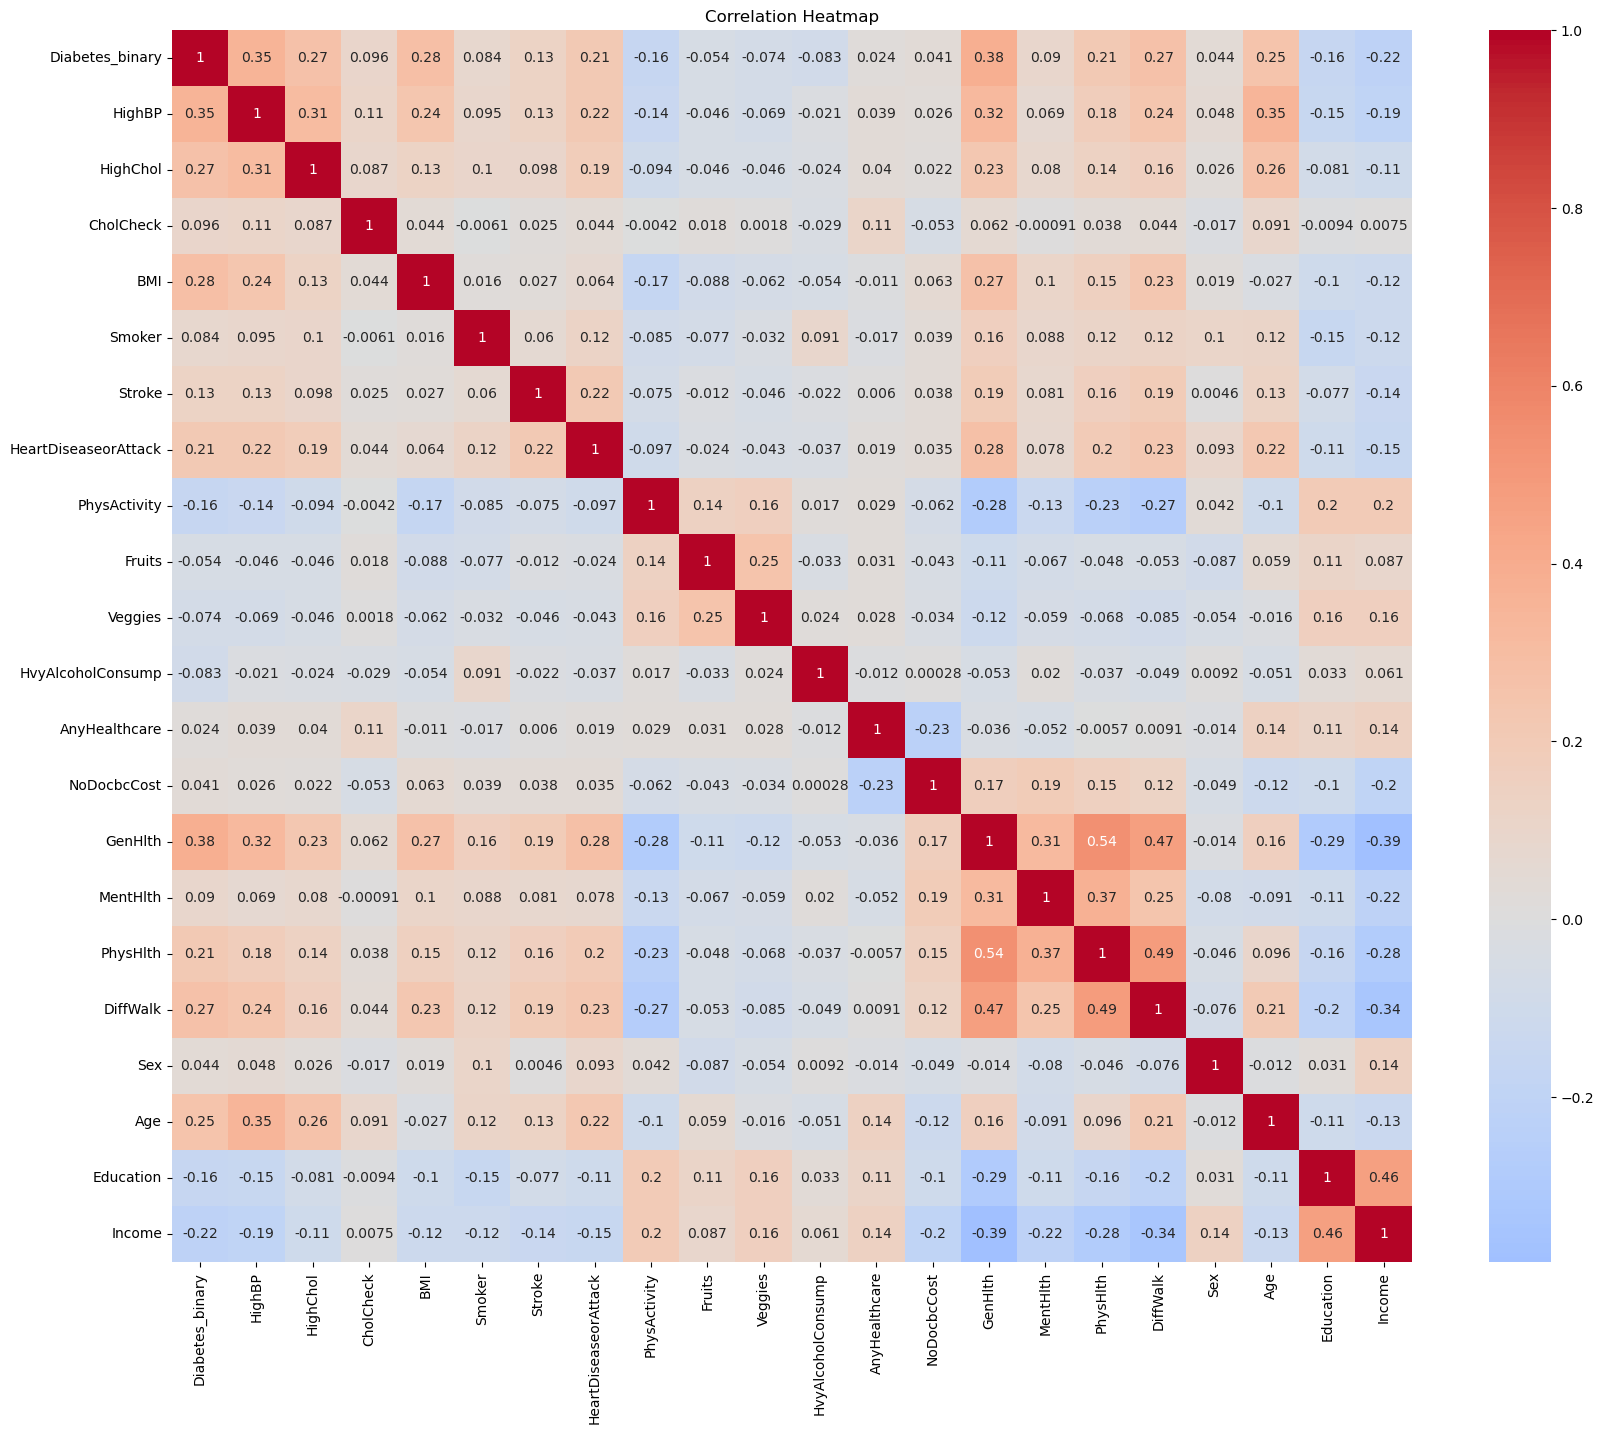

In [17]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [18]:
df[dependent_variable].value_counts()

0.0    72050
1.0    35346
Name: Diabetes_binary, dtype: int64

In [19]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         1.0
         ... 
107391    0.0
107392    0.0
107393    1.0
107394    1.0
107395    0.0
Name: Diabetes_binary, Length: 107396, dtype: float64

In [20]:
# Define the models and their corresponding parameters for GridSearchCV
models = {
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100, 200],
            'max_depth': [3, 5, 8 ,10],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7, 9]
        }
    }
    
}

In [21]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
len(X_train)/(len(X_train)+len(X_test))

0.7999925509329956

In [23]:
models.items()

dict_items([('Random Forest', {'model': RandomForestClassifier(), 'params': {'n_estimators': [10, 50, 100, 200], 'max_depth': [3, 5, 8, 10], 'min_samples_split': [2, 5, 10]}}), ('Boosting', {'model': GradientBoostingClassifier(), 'params': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7, 9]}})])

In [178]:
# # Initialize a list to store the model performance
# performance_list = []

# for name, model in models.items():
#     # Perform GridSearchCV for hyperparameter tuning
#     grid_search = GridSearchCV(model['model'], model['params'], cv=5, scoring='neg_mean_squared_error')
#     print(grid_search)
#     grid_search.fit(X_train, y_train)
    
#     # Train model with best parameters
#     best_model = grid_search.best_estimator_
#     best_model.fit(X_train, y_train)
#     print(best_model)
    
#     # Predict and calculate in-sample loss
#     in_sample_preds = best_model.predict(X_train)
#     in_sample_loss = mean_squared_error(y_train, in_sample_preds)
    
#     # Predict and calculate out-of-sample loss
#     out_of_sample_preds = best_model.predict(X_test)
#     out_of_sample_loss = mean_squared_error(y_test, out_of_sample_preds)
    
#     # Append model performance to the list
#     performance_list.append({
#         "Model": name, 
#         "Best Parameters": grid_search.best_params_, 
#         "In-Sample Loss": in_sample_loss,
#         "Out-of-Sample Loss": out_of_sample_loss
#     })
    
#     # Calculate and print feature importances
#     feature_importances = best_model.feature_importances_
#     importance_df = pd.DataFrame(feature_importances, index=X.columns, columns=['Importance'])
#     importance_df.sort_values(by='Importance', ascending=False, inplace=True)
    
#     # Plot feature importances
#     plt.figure(figsize=(12, 6))
#     sns.barplot(x='Importance', y=importance_df.index, data=importance_df)
#     plt.title(f'Feature Importances for {name}')
#     plt.show()

Grid Search Iteration
GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 8, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='neg_mean_squared_error')
best_model = 
RandomForestClassifier(max_depth=10, n_estimators=200)


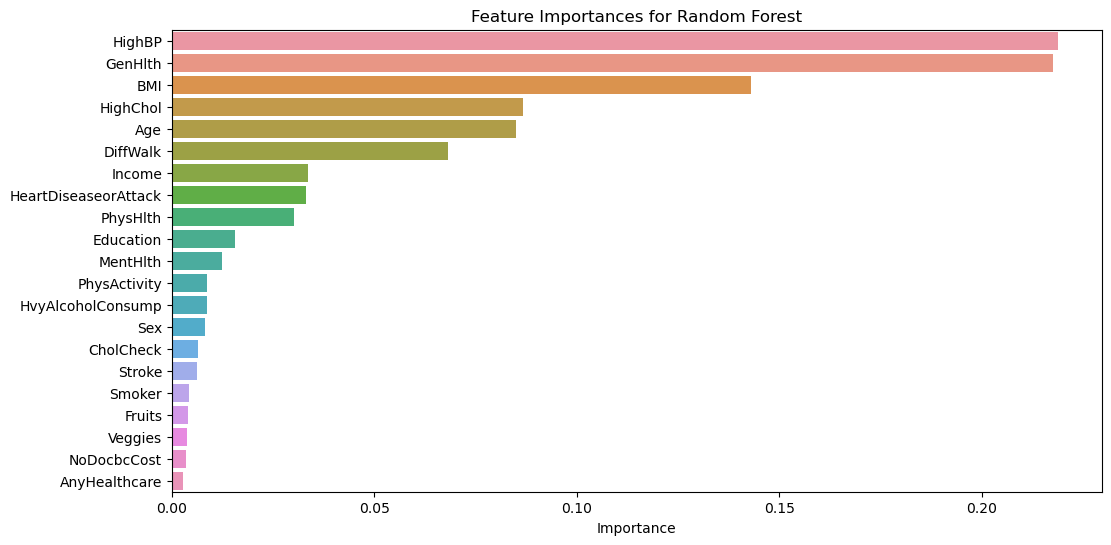

Grid Search Iteration
GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')
best_model = 
GradientBoostingClassifier()


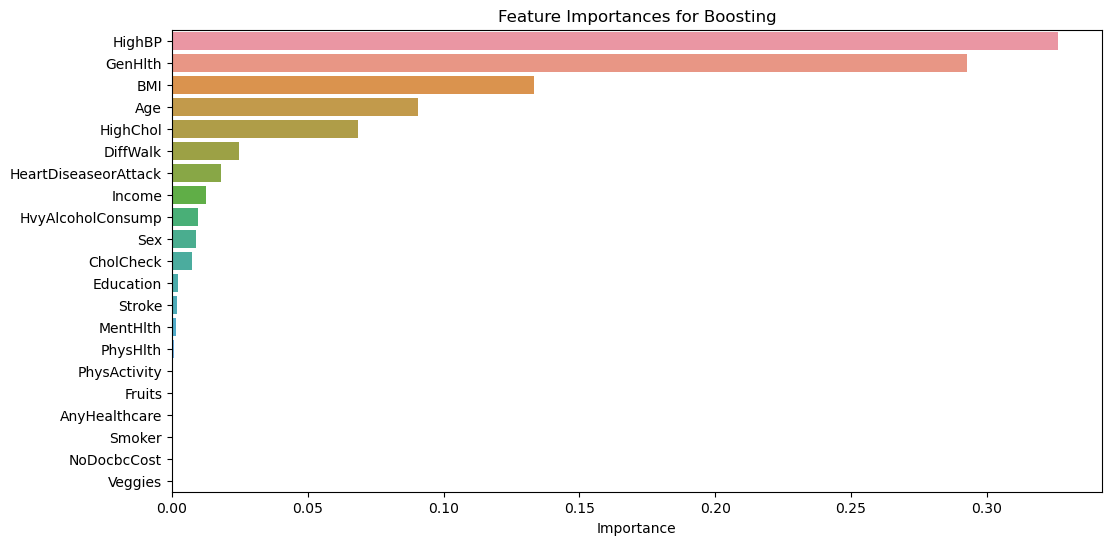

In [24]:
# Initialize a list to store the model performance
performance_list = []

for name, model in models.items():
    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model['model'], model['params'], cv=5, scoring='neg_mean_squared_error')
    print('Grid Search Iteration')
    print(grid_search)
    grid_search.fit(X_train, y_train)
    
    # Train model with best parameters
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)
    print('best_model = ')
    print(best_model)
    
    # Predict and calculate in-sample loss
    in_sample_preds = best_model.predict(X_train)
    in_sample_loss = mean_squared_error(y_train, in_sample_preds)
    
    # Predict and calculate out-of-sample loss
    out_of_sample_preds = best_model.predict(X_test)
    out_of_sample_loss = mean_squared_error(y_test, out_of_sample_preds)
    
    # Append model performance to the list
    performance_list.append({
        "Model": name, 
        "Best Parameters": grid_search.best_params_, 
        "In-Sample Loss": in_sample_loss,
        "Out-of-Sample Loss": out_of_sample_loss
    })
    
    # Calculate and print feature importances
    feature_importances = best_model.feature_importances_
    importance_df = pd.DataFrame(feature_importances, index=X.columns, columns=['Importance'])
    importance_df.sort_values(by='Importance', ascending=False, inplace=True)
    
    # Plot feature importances
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y=importance_df.index, data=importance_df)
    plt.title(f'Feature Importances for {name}')
    plt.show()

In [25]:
# Convert list to DataFrame and print model performances as a table
performance_df = pd.DataFrame(performance_list)
print(performance_df.to_markdown(index=False))

# Print the footnotes
print("\n\nFootnotes:")
print("Model - The type of model used.")
print("Best Parameters - The optimal hyperparameters found by GridSearchCV for this model.")
print("In-Sample Loss - The mean squared error loss of the model on the training data.")
print("Out-of-Sample Loss - The mean squared error loss of the model on the test data.")

| Model         | Best Parameters                                                |   In-Sample Loss |   Out-of-Sample Loss |
|:--------------|:---------------------------------------------------------------|-----------------:|---------------------:|
| Random Forest | {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200} |         0.219191 |             0.235847 |
| Boosting      | {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}    |         0.232518 |             0.232821 |


Footnotes:
Model - The type of model used.
Best Parameters - The optimal hyperparameters found by GridSearchCV for this model.
In-Sample Loss - The mean squared error loss of the model on the training data.
Out-of-Sample Loss - The mean squared error loss of the model on the test data.


In [67]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
i = [5,10,15,20]  # Number of neighbors to consider (you can tune this value)
for k in i:
    print('k= ',k)
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred_class = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_class)
    
    # Predict and calculate in-sample loss
    in_sample_preds_class = knn_classifier.predict(X_train)
    in_sample_loss_class = mean_squared_error(y_train, in_sample_preds_class)
    
    # Predict and calculate out-of-sample loss
    out_of_sample_preds_class = knn_classifier.predict(X_test)
    out_of_sample_loss_class = mean_squared_error(y_test, out_of_sample_preds_class)
    
    #KNN REGRESSION     
    
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    # Predict and calculate in-sample loss
    in_sample_preds = knn_regressor.predict(X_train)
    in_sample_loss = mean_squared_error(y_train, in_sample_preds)
    
    # Predict and calculate out-of-sample loss
    out_of_sample_preds = knn_regressor.predict(X_test)
    out_of_sample_loss = mean_squared_error(y_test, out_of_sample_preds)
    
    
    print("Accuracy:", accuracy)
    print("Mean Squared Error:", mse)
    print('Classifier in sample loss='  , in_sample_loss_class)
    print('Classifier out of sample loss=' , out_of_sample_loss_class)
    print('Regressor in sample loss='  , in_sample_loss)
    print('Regressor out of sample loss=' , out_of_sample_loss)
    print('======================')

k=  5
Accuracy: 0.7206238361266294
Mean Squared Error: 0.19245623836126635
Classifier in sample loss= 0.19171050793798594
Classifier out of sample loss= 0.27937616387337055
Regressor in sample loss= 0.12835141300805442
Regressor out of sample loss= 0.19245623836126635
k=  10
Accuracy: 0.7318901303538176
Mean Squared Error: 0.17650884543761639
Classifier in sample loss= 0.2206341077331347
Classifier out of sample loss= 0.2681098696461825
Regressor in sample loss= 0.14441675590111275
Regressor out of sample loss= 0.17650884543761639
k=  15
Accuracy: 0.7356145251396649
Mean Squared Error: 0.17169128905441755
Classifier in sample loss= 0.226861120163881
Classifier out of sample loss= 0.2643854748603352
Regressor in sample loss= 0.15039676997170365
Regressor out of sample loss= 0.17169128905441755
k=  20
Accuracy: 0.7392923649906891
Mean Squared Error: 0.16965735567970203
Classifier in sample loss= 0.23291354346105497
Classifier out of sample loss= 0.260707635009311
Regressor in sample loss

In [63]:
X_test.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
56259,0.0,1.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,6.0,7.0
94768,1.0,1.0,1.0,30.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,5.0,0.0,15.0,1.0,1.0,6.0,3.0,2.0
100131,1.0,1.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,4.0,20.0,5.0,0.0,0.0,13.0,6.0,6.0
75981,0.0,1.0,1.0,26.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,13.0,4.0,3.0
37400,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,0.0,2.0,0.0,1.0,10.0,5.0,7.0


In [68]:
y_pred

array([0.1 , 0.8 , 0.25, ..., 0.65, 0.05, 0.45])

In [69]:
y_pred_class

array([0., 1., 0., ..., 1., 0., 0.])

In [70]:
y_test

56259     0.0
94768     0.0
100131    1.0
75981     0.0
37400     1.0
         ... 
51914     0.0
95624     1.0
61614     1.0
97727     0.0
72235     0.0
Name: Diabetes_binary, Length: 21480, dtype: float64

In [77]:
X_test2 = X_test.copy()

In [91]:
type(X_test2.iloc[:,1])

pandas.core.series.Series

In [103]:
aa = [1,2,3,4,5,6,7]
np.random.shuffle(aa)
print(aa)

[1, 7, 6, 4, 2, 3, 5]


In [133]:
list_columns = list(df.columns)
list_columns

['Diabetes_binary',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [137]:
print(df['Stroke'].head())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Stroke, dtype: float64


In [126]:
df.shape

(107396, 22)

In [127]:
X_test.shape

(21480, 21)

feature =   HighBP
56259     0.0
94768     1.0
100131    1.0
75981     0.0
37400     1.0
Name: HighBP, dtype: float64
==permuted===
56259     1.0
94768     0.0
100131    1.0
75981     0.0
37400     1.0
Name: HighBP, dtype: float64
feature =   HighChol
56259     1.0
94768     1.0
100131    1.0
75981     1.0
37400     1.0
Name: HighChol, dtype: float64
==permuted===
56259     0.0
94768     1.0
100131    0.0
75981     0.0
37400     0.0
Name: HighChol, dtype: float64
feature =   CholCheck
56259     1.0
94768     1.0
100131    1.0
75981     1.0
37400     1.0
Name: CholCheck, dtype: float64
==permuted===
56259     1.0
94768     1.0
100131    1.0
75981     1.0
37400     1.0
Name: CholCheck, dtype: float64
feature =   BMI
56259     23.0
94768     30.0
100131    21.0
75981     26.0
37400     27.0
Name: BMI, dtype: float64
==permuted===
56259     25.0
94768     26.0
100131    33.0
75981     26.0
37400     21.0
Name: BMI, dtype: float64
feature =   Smoker
56259     1.0
94768     1.0
100131    0.0

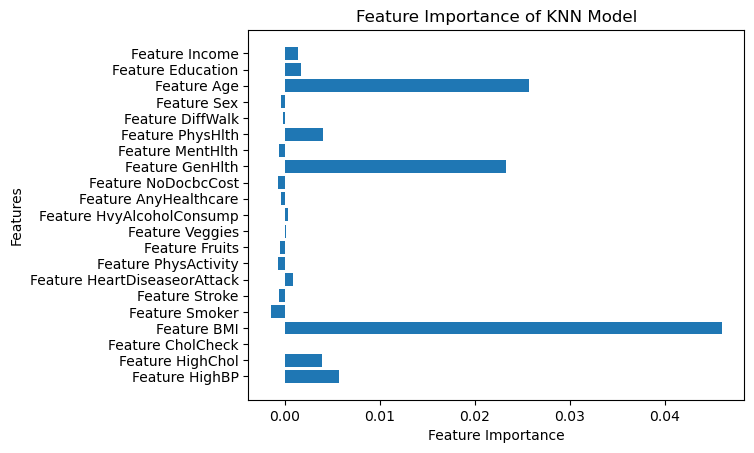

In [138]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy on the test set
baseline_accuracy = accuracy_score(y_test, y_pred_class)

list_columns = list(df.columns)[1:]

# Calculate feature importance based on feature permutation
feature_importance = {}
for i in list(X_test.columns):
    print("feature =  " , i)
    X_test_permuted = X_test.copy()
    print(X_test_permuted[i].head())
    X_test_permuted[i] = np.random.permutation(X_test_permuted[i].values)
    print("==permuted===")
    print(X_test_permuted[i].head())
#     np.random.shuffle(X_test_permuted.iloc[:, i])
    permuted_accuracy = accuracy_score(y_test, knn_classifier.predict(X_test_permuted))
    feature_importance[i] = baseline_accuracy - permuted_accuracy
    
    
# Plot the feature importance
feature_names = ['Feature '+ i for i in list(X_test.columns)]
plt.barh(feature_names, feature_importance.values())
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance of KNN Model')
plt.show()

In [150]:
# Plot the feature importance
feature_names = [i for i in list(X_test.columns)]

sorted_indices = np.argsort(list(feature_importance.values()))

In [151]:
sorted_indices

array([ 4,  7, 12,  5, 14,  8, 11, 17, 16,  2,  9, 10,  6, 20, 19,  1, 15,
        0, 13, 18,  3], dtype=int64)

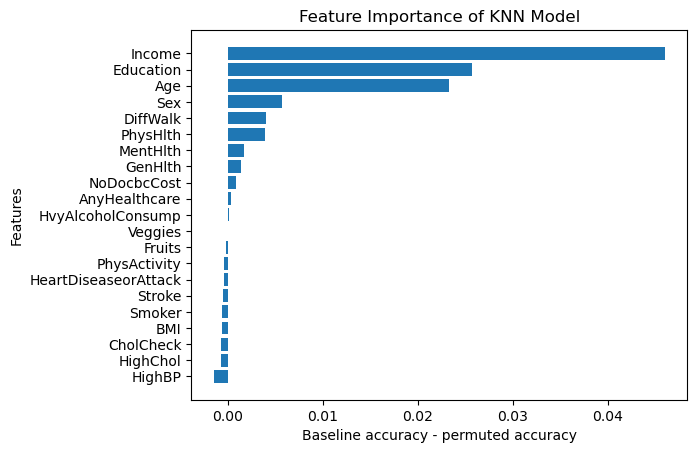

In [153]:
# Sort the feature_names and feature_importance based on sorted_indices
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importance = [feature_importance[feature_names[i]] for i in sorted_indices]


plt.barh(feature_names, sorted_feature_importance)
plt.xlabel('Baseline accuracy - permuted accuracy')
plt.ylabel('Features')
plt.title('Feature Importance of KNN Model')
plt.show()

In [172]:
#logistic regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)

y_pred = logreg_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.759729981378026
Confusion Matrix:
[[12428  1881]
 [ 3280  3891]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83     14309
         1.0       0.67      0.54      0.60      7171

    accuracy                           0.76     21480
   macro avg       0.73      0.71      0.71     21480
weighted avg       0.75      0.76      0.75     21480



In [173]:
y_pred

array([0., 1., 1., ..., 1., 0., 1.])

In [174]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,0.0,31.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,3.0
1,0.0,1.0,1.0,1.0,32.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,5.0,0.0,30.0,1.0,1.0,9.0,4.0,6.0
2,0.0,1.0,0.0,1.0,35.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,6.0,5.0,6.0
3,0.0,1.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,5.0,6.0,7.0
4,1.0,0.0,0.0,0.0,32.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,2.0,15.0,0.0,1.0,6.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107391,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,13.0,4.0,8.0
107392,0.0,1.0,1.0,1.0,26.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,2.0,3.0
107393,1.0,1.0,0.0,1.0,30.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,8.0
107394,1.0,1.0,0.0,1.0,29.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,4.0,8.0


In [ ]:
df2 = pd.concat(X_test,y_pred)

In [175]:
df.groupby('HighBP')['Diabetes_binary'].mean()

HighBP
0.0    0.162969
1.0    0.494921
Name: Diabetes_binary, dtype: float64

In [177]:
for i in list(df.columns):
    print('Variable = ' , i)
    print(df.groupby(i)['Diabetes_binary'].mean())
    print('===========================')

Variable =  Diabetes_binary
Diabetes_binary
0.0    0.0
1.0    1.0
Name: Diabetes_binary, dtype: float64
Variable =  HighBP
HighBP
0.0    0.162969
1.0    0.494921
Name: Diabetes_binary, dtype: float64
Variable =  HighChol
HighChol
0.0    0.208792
1.0    0.459467
Name: Diabetes_binary, dtype: float64
Variable =  CholCheck
CholCheck
0.0    0.073723
1.0    0.337136
Name: Diabetes_binary, dtype: float64
Variable =  BMI
BMI
13.0    0.285714
14.0    0.307692
15.0    0.218182
16.0    0.153846
17.0    0.163265
          ...   
89.0    0.230769
90.0    0.000000
92.0    0.357143
95.0    0.166667
98.0    0.500000
Name: Diabetes_binary, Length: 80, dtype: float64
Variable =  Smoker
Smoker
0.0    0.292932
1.0    0.371821
Name: Diabetes_binary, dtype: float64
Variable =  Stroke
Stroke
0.0    0.315164
1.0    0.582116
Name: Diabetes_binary, dtype: float64
Variable =  HeartDiseaseorAttack
HeartDiseaseorAttack
0.0    0.291626
1.0    0.596502
Name: Diabetes_binary, dtype: float64
Variable =  PhysActivity


In [179]:
in_sample_preds

array([0.15, 0.1 , 0.5 , ..., 0.5 , 0.05, 0.1 ])

In [181]:
X_train2 = X_train.copy()

In [184]:
len(X_train2)

85916

In [185]:
len(in_sample_preds_class)

85916

In [187]:
pd.Series(in_sample_preds_class).value_counts()

0.0    64380
1.0    21536
dtype: int64

In [182]:
X_train2['knn_class_score'] = pd.Series(in_sample_preds_class)

In [183]:
X_train2

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,knn_class_score
6517,1.0,1.0,1.0,30.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,9.0,4.0,7.0,0.0
79699,0.0,1.0,1.0,20.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,13.0,5.0,5.0,1.0
84870,0.0,0.0,1.0,21.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,5.0,0.0,10.0,0.0,1.0,11.0,5.0,2.0,0.0
41680,0.0,0.0,1.0,40.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,3.0,0.0,0.0,0.0,0.0,2.0,6.0,1.0,0.0
46251,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,6.0,5.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54886,0.0,1.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,8.0,6.0,8.0,0.0
76820,1.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,10.0,5.0,0.0,0.0,9.0,6.0,7.0,1.0
103694,0.0,1.0,1.0,40.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,4.0,30.0,10.0,1.0,0.0,5.0,5.0,8.0,NaN
860,0.0,0.0,1.0,19.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,3.0,0.0,0.0,0.0,0.0,13.0,5.0,8.0,0.0


In [191]:
X_train2.loc[103694]

HighBP                   0.0
HighChol                 1.0
CholCheck                1.0
BMI                     40.0
Smoker                   1.0
Stroke                   0.0
HeartDiseaseorAttack     0.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        0.0
AnyHealthcare            0.0
NoDocbcCost              1.0
GenHlth                  4.0
MentHlth                30.0
PhysHlth                10.0
DiffWalk                 1.0
Sex                      0.0
Age                      5.0
Education                5.0
Income                   8.0
knn_class_score          NaN
Name: 103694, dtype: float64

In [202]:
for i in list(X_train2.columns):
    print('Variable = ' , i)
    print(X_train2.groupby(i).aggregate({'knn_class_score':'mean'}))
    print('===========================')

Variable =  HighBP
        knn_class_score
HighBP                 
0.0            0.246785
1.0            0.256490
Variable =  HighChol
          knn_class_score
HighChol                 
0.0              0.250455
1.0              0.252923
Variable =  CholCheck
           knn_class_score
CholCheck                 
0.0               0.252109
1.0               0.251625
Variable =  BMI
      knn_class_score
BMI                  
13.0         0.000000
14.0         0.222222
15.0         0.184211
16.0         0.195402
17.0         0.237569
...               ...
89.0         0.200000
90.0         0.000000
92.0         0.222222
95.0         0.250000
98.0         0.333333

[76 rows x 1 columns]
Variable =  Smoker
        knn_class_score
Smoker                 
0.0            0.248849
1.0            0.254932
Variable =  Stroke
        knn_class_score
Stroke                 
0.0            0.252297
1.0            0.239856
Variable =  HeartDiseaseorAttack
                      knn_class_score
Hear

In [204]:
X_test2 = X_test.copy()
X_test2['knn_class_score'] = pd.Series(out_of_sample_preds_class)

for i in list(X_test2.columns):
    print('Variable = ' , i)
    print(X_test2.groupby(i).aggregate({'knn_class_score':'mean'}))
    print('===========================')

Variable =  HighBP
        knn_class_score
HighBP                 
0.0             0.25150
1.0             0.25367
Variable =  HighChol
          knn_class_score
HighChol                 
0.0              0.256209
1.0              0.248538
Variable =  CholCheck
           knn_class_score
CholCheck                 
0.0               0.237288
1.0               0.253015
Variable =  BMI
      knn_class_score
BMI                  
13.0              NaN
14.0         0.500000
15.0         1.000000
16.0         0.600000
17.0         0.230769
...               ...
87.0              NaN
88.0         1.000000
89.0         1.000000
92.0              NaN
95.0              NaN

[74 rows x 1 columns]
Variable =  Smoker
        knn_class_score
Smoker                 
0.0            0.250730
1.0            0.254872
Variable =  Stroke
        knn_class_score
Stroke                 
0.0            0.250664
1.0            0.291262
Variable =  HeartDiseaseorAttack
                      knn_class_score
Hear

In [211]:
import matplotlib
from matplotlib import pyplot
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
